# REDES CONVOLUCIONALES 

---



> **REDES CONVOLUCIONALES COMO FUNCIÓN HEURÍSTICA**



Importamos las librerias necesarias para entrenar y crear la red.

In [14]:
#Para cargar y operar con el dataset
import pandas as pd
import numpy as np

#Para entrenar y crear el modelo de la red convolucional
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers, models

#Para imprimir el modelo
import matplotlib.pyplot as plt

In [15]:
print(tf.__version__)

2.12.0


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para la entrada de la red convolucinal usaremos una matriz que contenga cada casilla del tablero y las piezas del mismo, es decir, si tuvieramos esta posición:


<br/>

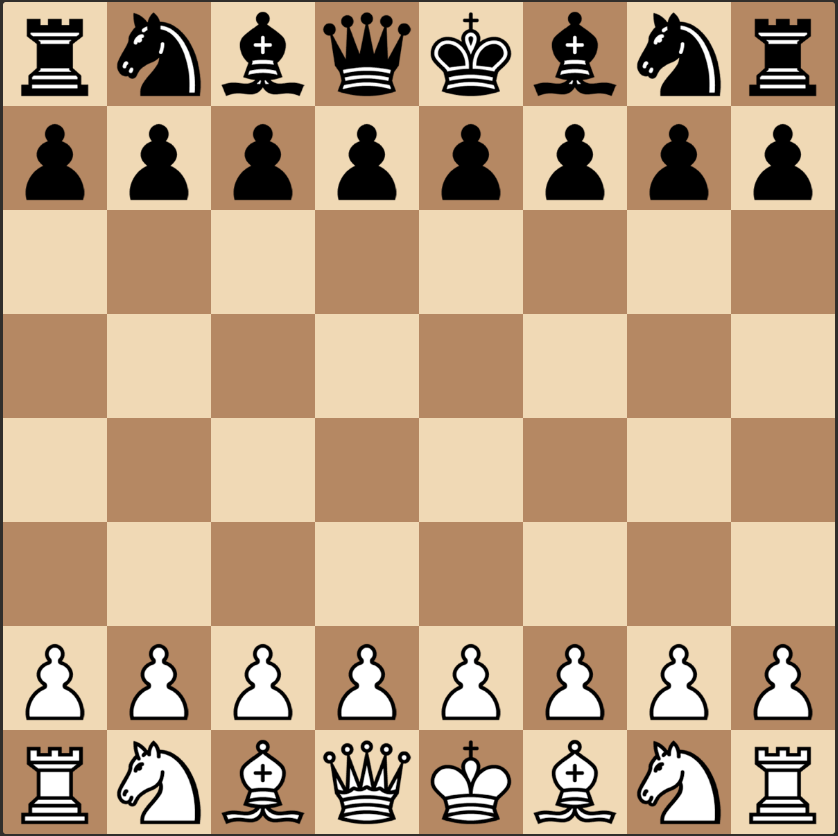

<br/>
<br/>
Tendríamos esta matriz:
<br/>
<br/>
-4  -2  -3  -5  -6  -3  -2  -4

-1  -1  -1  -1  -1  -1  -1  -1

0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

1  1  1  1  1  1  1  1

4  2  3  5  6  3  2  4

<br/>

Una vez tenemos la matriz de entrada separamos la misma para cada pieza del tablero, un ejemplo para los peones blancos sería el siguiente:

<br/>

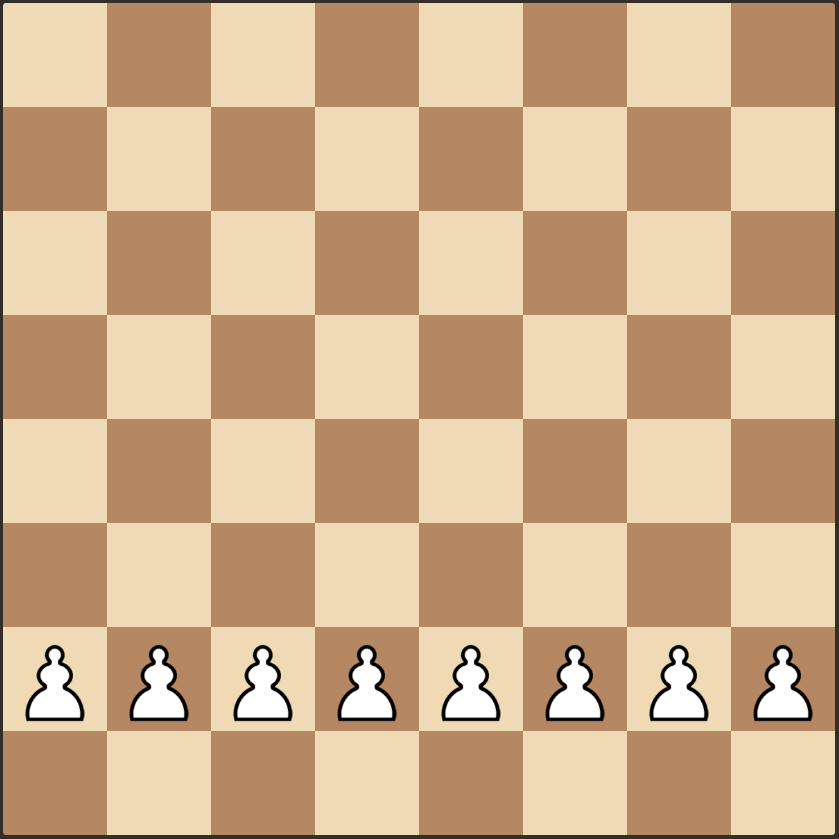

<br/>
<br/>

Esta sería su matriz:


<br/>


0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

0  0  0  0  0  0  0  0

1  1  1  1  1  1  1  1

0  0  0  0  0  0  0  0




* Cargamos el dataset, en caso de no estar incluido, incluirlo en el entorno de 
ejecución

In [58]:
train = pd.read_json('drive/MyDrive/Colab Notebooks/Alphaupo-Convolucionales/trainPosicionesMap.json')
test = pd.read_json('drive/MyDrive/Colab Notebooks/Alphaupo-Convolucionales/testPosicionesMap.json')

* Imprimimos las cinco primeras filas del dataset, donde posiciones contiene la posición completa, y contiene el resultado y las demás columnas contiene la imagen de la posición con cada una de las piezas indicadas en el nombre

In [59]:
train = train.rename(columns={'evaluacionesBlancas': 'y'})
test = test.rename(columns={'evaluacionesBlancas': 'y'})

"""
# define the min-max scaler function
def min_max_scaler(column):
    return (column - column.min()) / (column.max() - column.min())

# apply the min-max scaler function to the column
train['y'] = min_max_scaler(train['y'])
"""


# Define a normalization function
def normalize_column(matrix):
    norm = np.linalg.norm(matrix)
    if norm == 0:
        return matrix
    return matrix / norm

"""
# Apply the normalization function to each matrix in the matrix column
train = train.drop('posiciones', axis=1)
train['peones_blancos'] = train['peones_blancos'].apply(normalize_column)
train['peones_negros'] = train['peones_negros'].apply(normalize_column)
train['caballos_blancos'] = train['peones_blancos'].apply(normalize_column)
train['caballos_negros'] = train['peones_negros'].apply(normalize_column)
train['alfiles_blancos'] = train['peones_blancos'].apply(normalize_column)
train['alfiles_negros'] = train['peones_negros'].apply(normalize_column)
train['torres_blancos'] = train['peones_blancos'].apply(normalize_column)
train['torres_negros'] = train['peones_negros'].apply(normalize_column)
train['reina_blancos'] = train['reina_blancos'].apply(normalize_column)
train['reina_negros'] = train['reina_negros'].apply(normalize_column)
train['rey_blancos'] = train['rey_blancos'].apply(normalize_column)
train['rey_negros'] = train['rey_negros'].apply(normalize_column)


test = test.drop('posiciones', axis=1)
test['peones_blancos'] = test['peones_blancos'].apply(normalize_column)
test['peones_negros'] = test['peones_negros'].apply(normalize_column)
test['caballos_blancos'] = test['peones_blancos'].apply(normalize_column)
test['caballos_negros'] = test['peones_negros'].apply(normalize_column)
test['alfiles_blancos'] = test['peones_blancos'].apply(normalize_column)
test['alfiles_negros'] = test['peones_negros'].apply(normalize_column)
test['torres_blancos'] = test['peones_blancos'].apply(normalize_column)
test['torres_negros'] = test['peones_negros'].apply(normalize_column)
test['reina_blancos'] = test['reina_blancos'].apply(normalize_column)
test['reina_negros'] = test['reina_negros'].apply(normalize_column)
test['rey_blancos'] = test['rey_blancos'].apply(normalize_column)
test['rey_negros'] = test['rey_negros'].apply(normalize_column)




print(train['peones_negros'][0])
"""
train.head()

,posiciones,y,peones_blancos,peones_negros,caballos_blancos,caballos_negros,alfiles_blancos,alfiles_negros,torres_blancos,torres_negros,reina_blancos,reina_negros,rey_blancos,rey_negros
0,"[[-4, -2, -3, -5, -6, -3, -2, -4], [0, -1, -1,...",65,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, -1, -1, -1, -1,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, -2, 0, 0, 0, 0, -2, 0], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, -3, 0, 0, -3, 0, 0], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[-4, 0, 0, 0, 0, 0, 0, -4], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, -5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, -6, 0, 0, 0], [0, 0, 0, 0, 0, 0,..."
1,"[[-4, -2, -3, -5, -6, -3, -2, -4], [0, -1, -1,...",121,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, -1, -1, -1, -1,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, -2, 0, 0, 0, 0, -2, 0], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, -3, 0, 0, -3, 0, 0], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[-4, 0, 0, 0, 0, 0, 0, -4], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, -5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, -6, 0, 0, 0], [0, 0, 0, 0, 0, 0,..."
2,"[[-4, -2, -3, -5, -6, -3, -2, -4], [0, -1, -1,...",134,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, -1, -1, -1, -1,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, -2, 0, 0, 0, 0, -2, 0], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, -3, 0, 0, -3, 0, 0], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[-4, 0, 0, 0, 0, 0, 0, -4], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, -5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, -6, 0, 0, 0], [0, 0, 0, 0, 0, 0,..."
3,"[[-4, -2, -3, -5, -6, -3, -2, -4], [0, -1, -1,...",229,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, -1, -1, 0, -1, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, -2, 0, 0, 0, 0, -2, 0], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, -3, 0, 0, -3, 0, 0], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[-4, 0, 0, 0, 0, 0, 0, -4], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, -5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, -6, 0, 0, 0], [0, 0, 0, 0, 0, 0,..."
4,"[[-4, -2, -3, -5, -6, -3, -2, -4], [0, -1, -1,...",531,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, -1, -1, 0, -1, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, -2, 0, 0, 0, 0, -2, 0], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, -3, 0, 0, -3, 0, 0], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[-4, 0, 0, 0, 0, 0, 0, -4], [0, 0, 0, 0, 0, 0...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, -5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, -6, 0, 0, 0], [0, 0, 0, 0, 0, 0,..."


* Separamos la X y la Y para la entrada y comprobación de la red, en X guardamos todas las columnas del dataset menos y, en Y guardamos la y del dataset

In [60]:
#Separamos los valores del output (y) y input(x)
trainX = tf.constant(train.drop("y",axis=1).values.tolist())
testX = tf.constant(test.drop("y",axis=1).values.tolist())

trainY = tf.constant(train["y"].values)
testY = tf.constant(test["y"].values)

* Creamos el modelo de la red convolucional usando tensorflow y keras

In [61]:
#Creamos el modelo de la red convolucional

model = models.Sequential()
model.add(layers.Conv2D(128, (2, 2), activation='relu', input_shape=(13, 8, 8)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(Dropout(0.5))
model.add(layers.Conv2D(256, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(Dropout(0.5))
model.add(layers.Conv2D(256, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(Dropout(0.5))
model.add(layers.Conv2D(256, (2, 2), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1))

* Resumen del modelo

In [62]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 12, 7, 128)        4224      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 7, 128)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 12, 7, 128)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 6, 256)        131328    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 11, 6, 256)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 11, 6, 256)       

* Compilamos el modelo

In [63]:
optimizer = tf.keras.optimizers.RMSprop(0.0001)

"""
history = modelo.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
"""
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


* Entrenamos el modelo

In [64]:
#Entrenamos el modelo

history = model.fit(trainX, trainY, epochs=30, 
                    validation_data=(testX, testY))

Epoch 1/30
584/584 [==============================] - 7s 8ms/step - loss: 9816291.0000 - mae: 2223.1187 - val_loss: 7720489.0000 - val_mae: 1844.3075
Epoch 2/30
584/584 [==============================] - 4s 7ms/step - loss: 8254385.5000 - mae: 1950.4323 - val_loss: 7482816.5000 - val_mae: 1808.7814
Epoch 3/30
584/584 [==============================] - 4s 6ms/step - loss: 7956772.0000 - mae: 1900.6991 - val_loss: 7454258.5000 - val_mae: 1721.0160
Epoch 4/30
584/584 [==============================] - 4s 7ms/step - loss: 7566487.5000 - mae: 1824.4973 - val_loss: 7221095.5000 - val_mae: 1640.0233
Epoch 5/30
584/584 [==============================] - 4s 8ms/step - loss: 7445309.5000 - mae: 1792.4280 - val_loss: 7298732.0000 - val_mae: 1634.5879
Epoch 6/30
584/584 [==============================] - 4s 7ms/step - loss: 7237701.0000 - mae: 1751.6312 - val_loss: 6971870.0000 - val_mae: 1594.7230
Epoch 7/30
584/584 [==============================] - 4s 7ms/step - loss: 7072291.5000 - mae: 1711.4

* Imprimimos los resultados del entrenamiento

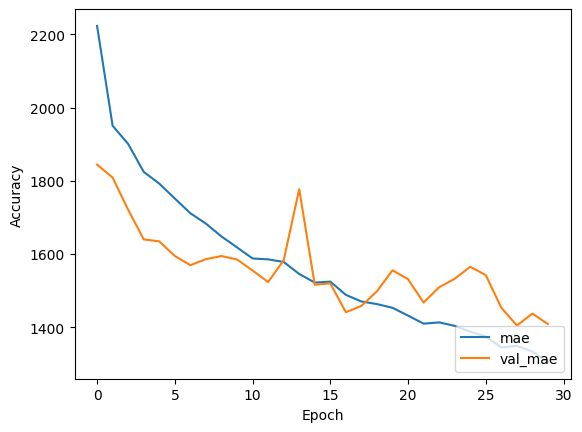

In [65]:
#Hacemos el plot de la precision de entrenamiento y de test

plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

* Imprimimos la perdida de train en azul y de test en naranja

<Axes: >

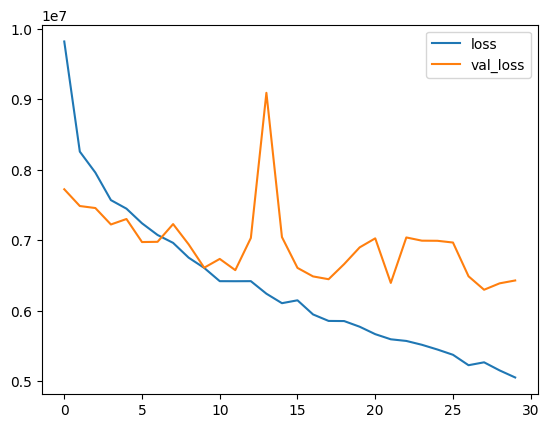

In [67]:
#Imprimimos la perdida

metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot()

* Hacemos las predicciones sobre el conjunto de test

In [ ]:
#Hacemos las predicciones sobre el conjunto de test

res = model.predict(testX)

129/129 [==============================] - 0s 3ms/step


* Imprimimos el número de aciertos sobre el conjunto de test

In [ ]:
#Imprimimos la tasa de acierto sobre el conjunto de test

print(res[0:10])
print(testY[0:10])


[[ 165.53394]
 [ 178.70001]
 [ 271.89584]
 [ 269.05652]
 [ 489.71008]
 [ 634.3261 ]
 [1025.6959 ]
 [2292.2979 ]
 [2532.4688 ]
 [1515.5477 ]]
tf.Tensor([ 103  137  256  334  568  692 1113 1175 1512 1589], shape=(10,), dtype=int64)


* Exportamos el modelo

In [ ]:
model.save('drive/MyDrive/Colab Notebooks/Alphaupo-Convolucionales/modeloJaquesMate')